# Hot Dog, Not Hot Dog
Recreating the famous classifier from S4E4 of *Silicon Valley* using a neural network

Data can be found here [Kaggle - Hotdog | Not Hotdog](https://www.kaggle.com/datasets/thedatasith/hotdog-nothotdog)


In [1]:
#let's get rolling with tensorflow
import tensorflow as tf 
from tensorflow import keras

In [2]:
#from keras.preprocessing.image import load_img 
#img = load_img('')

In [3]:
#import image data using keras
#train = tf.keras.utils.image_dataset_from_directory('train', labels = 'inferred', label_mode = 'categorical', image_size=(256,256), color_mode = 'rgb')
seed = 69

#create train and validation splits

train_set = tf.keras.preprocessing.image_dataset_from_directory(
    directory='train', labels='inferred', label_mode='int',
    seed=seed, validation_split=.25, subset="training", crop_to_aspect_ratio=True)
valid_set = tf.keras.preprocessing.image_dataset_from_directory(
    directory='train', labels='inferred', label_mode='int',
    seed=seed, validation_split=.25, subset="validation", crop_to_aspect_ratio=True)

Found 4242 files belonging to 2 classes.
Using 3182 files for training.
Found 4242 files belonging to 2 classes.
Using 1060 files for validation.


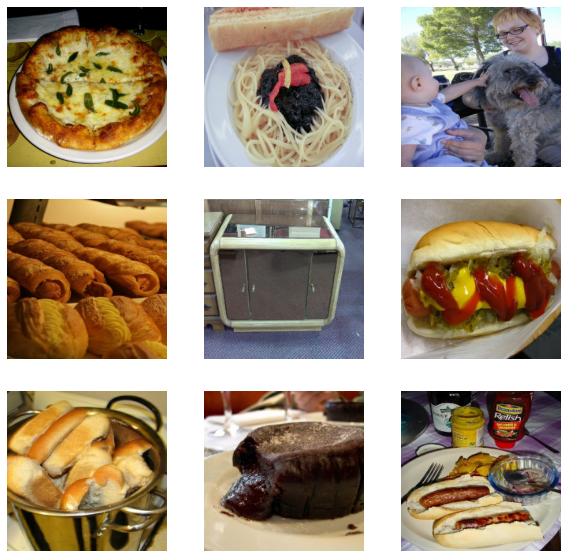

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_set.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [5]:
#create model
#two outputs, one probability that it is a hot dog
#another probability it is not a hot dog
#3 layer neural network (2 hidden one output)
#for reference a log regression is sometimes referred to as a single layer neural net
model = keras.models.Sequential()
model.add(keras.layers.Rescaling(1./255))
model.add(keras.layers.Flatten(input_shape = [256,256]))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(2, activation = 'softmax'))

In [6]:
#compile model
model.compile(loss = "sparse_categorical_crossentropy", optimizer = 'sgd', metrics =['accuracy'])

In [7]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices())

2.9.1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
#with cpu
tf.debugging.set_log_device_placement(True)
with tf.device('/CPU:0'):
    history = model.fit(train_set,epochs = 30, validation_data=valid_set)

Epoch 1/30
100/100 [==============================] - 8s 74ms/step - loss: 1.7585 - accuracy: 0.4764 - val_loss: 0.6931 - val_accuracy: 0.5038
Epoch 2/30
100/100 [==============================] - 8s 77ms/step - loss: 0.6939 - accuracy: 0.4959 - val_loss: 0.6931 - val_accuracy: 0.5047
Epoch 3/30
100/100 [==============================] - 8s 76ms/step - loss: 0.6937 - accuracy: 0.5113 - val_loss: 0.6942 - val_accuracy: 0.4925
Epoch 4/30
100/100 [==============================] - 8s 76ms/step - loss: 0.6933 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.5028
Epoch 5/30
100/100 [==============================] - 8s 77ms/step - loss: 0.6926 - accuracy: 0.5069 - val_loss: 0.6927 - val_accuracy: 0.5104
Epoch 6/30
100/100 [==============================] - 9s 87ms/step - loss: 0.6909 - accuracy: 0.5393 - val_loss: 0.7016 - val_accuracy: 0.5151
Epoch 7/30
100/100 [==============================] - 10s 95ms/step - loss: 0.6897 - accuracy: 0.5374 - val_loss: 0.6891 - val_accuracy: 0.526

In [9]:
#with gpu
tf.debugging.set_log_device_placement(True)
with tf.device('/GPU:0'):
    history2 = model.fit(train_set,epochs = 30, validation_data=valid_set)

Epoch 1/30
100/100 [==============================] - 7s 65ms/step - loss: 0.6889 - accuracy: 0.5321 - val_loss: 0.7064 - val_accuracy: 0.5085
Epoch 2/30
100/100 [==============================] - 7s 64ms/step - loss: 0.6876 - accuracy: 0.5289 - val_loss: 0.6928 - val_accuracy: 0.5255
Epoch 3/30
100/100 [==============================] - 6s 64ms/step - loss: 0.6878 - accuracy: 0.5311 - val_loss: 0.6916 - val_accuracy: 0.5264
Epoch 4/30
100/100 [==============================] - 7s 65ms/step - loss: 0.6866 - accuracy: 0.5468 - val_loss: 0.6912 - val_accuracy: 0.5151
Epoch 5/30
100/100 [==============================] - 6s 64ms/step - loss: 0.6824 - accuracy: 0.5503 - val_loss: 0.6908 - val_accuracy: 0.5245
Epoch 6/30
100/100 [==============================] - 7s 64ms/step - loss: 0.6796 - accuracy: 0.5563 - val_loss: 0.6883 - val_accuracy: 0.5387
Epoch 7/30
100/100 [==============================] - 6s 64ms/step - loss: 0.6799 - accuracy: 0.5657 - val_loss: 0.6945 - val_accuracy: 0.5038